# Text-to-Speech web inference using Gradio

STT Mel synthesis + Vocoder

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-gradio](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-gradio).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline

For this example, I am going to use GlowTTS. Feel free to use any TTS model.

### List available GlowTTS

In [2]:
malaya_speech.tts.available_glowtts()

,Size (MB),Quantized Size (MB),Combined loss
male,119.0,27.6,-1.429
female,119.0,27.6,-1.464
haqkiem,119.0,27.6,-1.649
female-singlish,119.0,27.6,-1.728
multispeaker,404.0,79.9,-1.882


### Load GlowTTS model

Fastspeech2 use text normalizer from Malaya, https://malaya.readthedocs.io/en/latest/load-normalizer.html#Load-normalizer,

Make sure you install Malaya version > 4.0 and Malaya-Boilerplate >= 0.0.12 to make it works,

```bash
pip install malaya -U
```

```python
def glowtts(model: str = 'male',
            quantized: bool = False,
            pad_to: int = 2,
            true_case_model=None,
            **kwargs):
    """
    Load GlowTTS TTS model.

    Parameters
    ----------
    model : str, optional (default='male')
        Model architecture supported. Allowed values:

        * ``'female'`` - GlowTTS trained on female voice.
        * ``'male'`` - GlowTTS trained on male voice.
        * ``'haqkiem'`` - GlowTTS trained on Haqkiem voice, https://www.linkedin.com/in/haqkiem-daim/
        * ``'female-singlish'`` - GlowTTS trained on female Singlish voice, https://www.imda.gov.sg/programme-listing/digital-services-lab/national-speech-corpus
        * ``'multispeaker'`` - Multispeaker GlowTTS trained on male, female, husein and haqkiem voices, also able to do voice conversion.

    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model.
        Quantized model not necessary faster, totally depends on the machine.
    pad_to : int, optional (default=2)
        size of pad character with 0. Increase can stable up prediction on short sentence, we trained on 2.
    true_case_model: str, optional (default=None)
        load any true case model, eg, malaya true case model from https://malaya.readthedocs.io/en/latest/load-true-case.html
        the interface must accept a string, return a string, eg, string = true_case_model(string)

    Returns
    -------
    result : malaya_speech.model.tf.GlowTTS class
    """
```

In [3]:
male = malaya_speech.tts.glowtts(model = 'male')

In [4]:
universal_melgan = malaya_speech.vocoder.melgan(model = 'universal-1024')

### web inference using Gradio

```python
def gradio(self, vocoder: Callable, **kwargs):
    """
    Text-to-Speech on Gradio interface.

    Parameters
    ----------
    vocoder: bool, Callable
        vocoder object that has `predict` method, prefer from malaya_speech itself.

    **kwargs: keyword arguments for `predict` and `iface.launch`.
    """
```

In [6]:
male.gradio(universal_melgan)

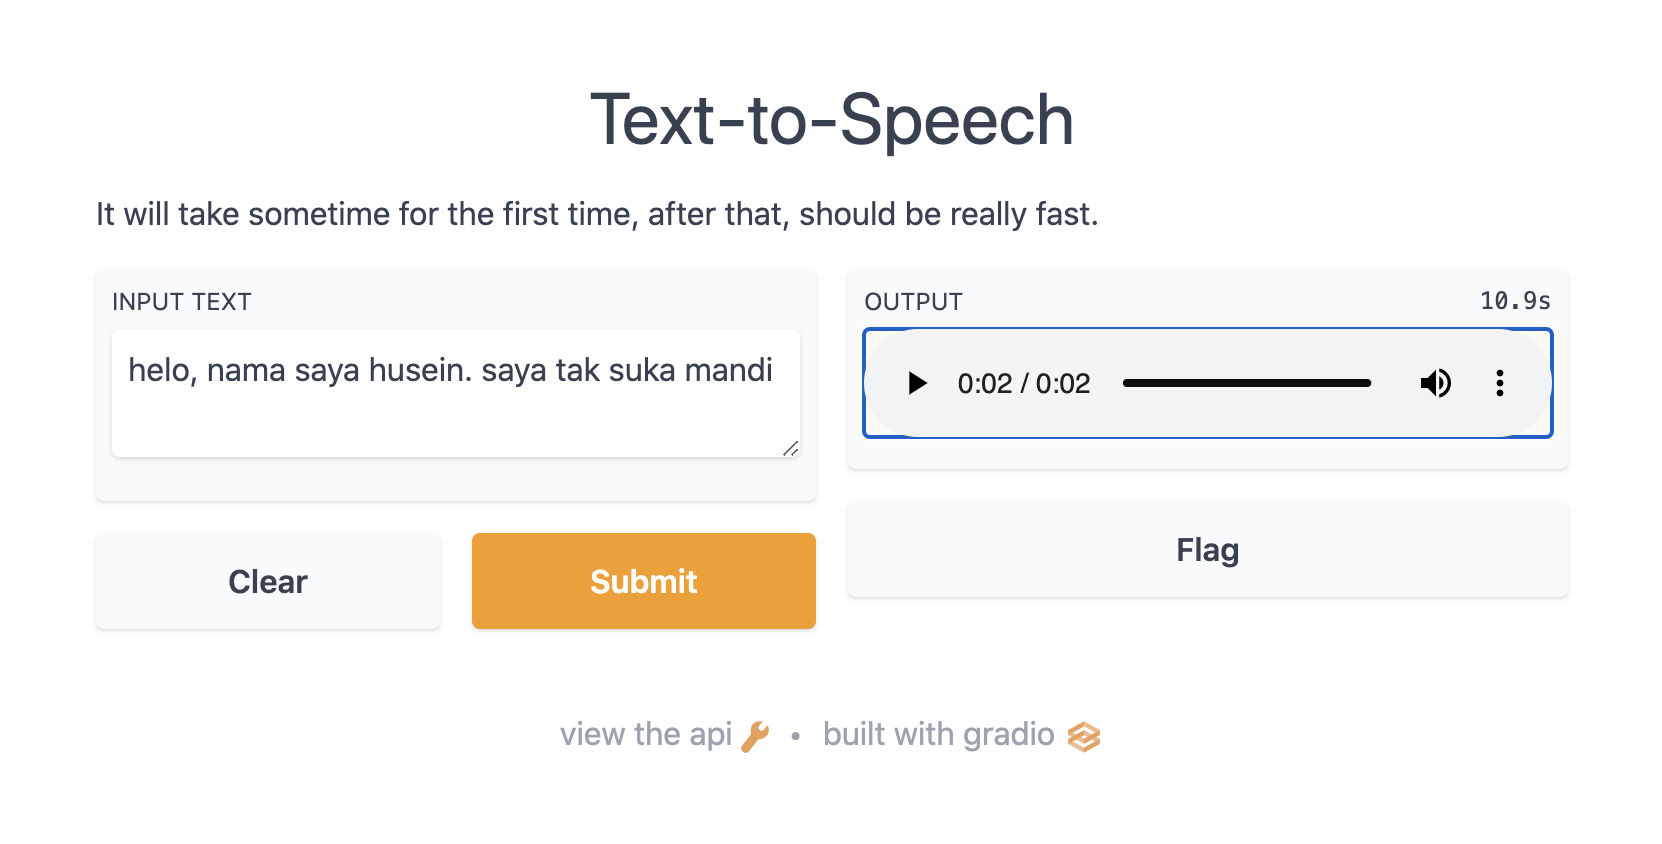

In [7]:
from IPython.core.display import Image, display

display(Image('tts.png', width=800))